# Imports

In [1]:
import os.path as osp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from gather_data import linear, rational, loss

# Load all data

In [2]:
# Ground-truth values
alpha = 0.9600173033359185 
beta = 0.699512049949576

# Data from previous task
opt_data = pd.read_csv(osp.join('..', 'data', 'task2_data_2d.csv'))
approx_direct = pd.read_csv(osp.join('..', 'data', 'task2_2d.csv'))
approx_direct.sort_values(['approx_func', 'method'])

# Data from this task
approx_grad = pd.read_csv(osp.join('..', 'data', 'task3.csv'))
approx_grad.sort_values(['approx_func', 'method'])

,method,approx_func,loss,a,b,iterations
2,conj_gd,linear,106.842473,0.798516,0.882210,6
0,gd,linear,106.842473,0.798509,0.882214,767
6,lm,linear,106.842473,0.798516,0.882210,2
4,newton,linear,106.842473,0.798516,0.882210,6
3,conj_gd,rational,106.705891,0.947159,-0.470471,23
1,gd,rational,106.705891,0.947161,-0.470469,226
7,lm,rational,106.705891,0.947142,-0.470489,7
5,newton,rational,106.705891,0.947159,-0.470471,16


# Visualize approximations

In [3]:
plt.rcParams["figure.figsize"] = (10, 6)
METHODS = {'brute_force_opt': 'Brute Force',
           'gauss_opt': 'Gauss',
           'nelder_mead_opt': 'Nelder-Mead',
           'gd': 'Gradient Descent',
           'conj_gd': 'Conjugate Gradient Descent',
           'newton': 'Newton\'s',
           'lm': 'Levenberg-Marquardt'}

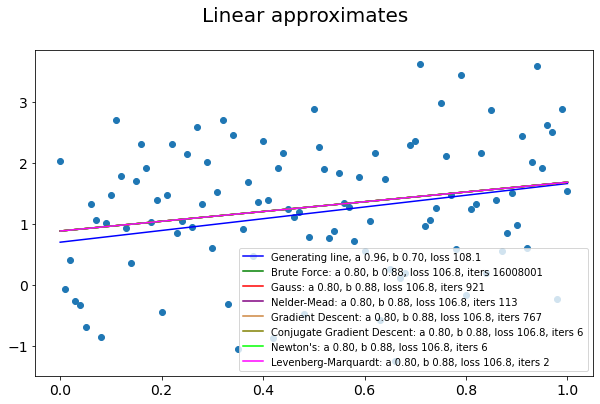

In [4]:
plt.scatter(opt_data['X'], opt_data['y'])
true_loss = loss(linear, opt_data['X'], alpha, beta, opt_data['y'])
plt.plot(opt_data['X'], opt_data['y_clean'], c='blue', label=f'Generating line, a {alpha:.2f}, b {beta:.2f}, loss {true_loss:.1f}')
for method, color in zip(['brute_force_opt', 'gauss_opt', 'nelder_mead_opt'],
                         ['green', 'red', 'purple']):
    row = approx_direct[(approx_direct['method'] == method) & (approx_direct['approx_func'] == 'linear_approx')]
    a, b = row['a'].values[0], row['b'].values[0]
    y_pred = linear(opt_data['X'], a, b)
    loss_value = row['loss'].values[0]
    iters = row['iterations'].values[0]
    plt.plot(opt_data['X'], y_pred, c=color, label=f'{METHODS[method]}: a {a:.2f}, b {b:.2f}, loss {loss_value:.1f}, iters {iters}')
    
for method, color in zip(['gd', 'conj_gd', 'newton', 'lm'],
                         ['peru', 'olive', 'lime', 'magenta']):
    row = approx_grad[(approx_grad['method'] == method) & (approx_grad['approx_func'] == 'linear')]
    a, b = row['a'].values[0], row['b'].values[0]
    y_pred = linear(opt_data['X'], a, b)
    loss_value = row['loss'].values[0]
    iters = row['iterations'].values[0]
    plt.plot(opt_data['X'], y_pred, c=color, label=f'{METHODS[method]}: a {a:.2f}, b {b:.2f}, loss {loss_value:.1f}, iters {iters}')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.suptitle('Linear approximates', fontsize=20)
plt.show();

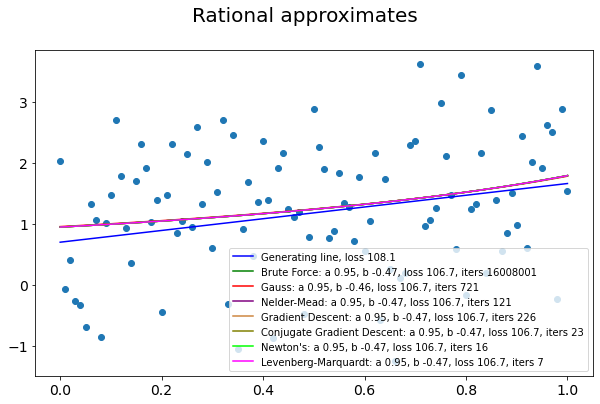

In [5]:
plt.scatter(opt_data['X'], opt_data['y'])
true_loss = loss(linear, opt_data['X'], alpha, beta, opt_data['y'])
plt.plot(opt_data['X'], opt_data['y_clean'], c='blue', label=f'Generating line, loss {true_loss:.1f}')
for method, color in zip(['brute_force_opt', 'gauss_opt', 'nelder_mead_opt'],
                         ['green', 'red', 'purple']):
    row = approx_direct[(approx_direct['method'] == method) & (approx_direct['approx_func'] == 'rational_approx')]
    a, b = row['a'].values[0], row['b'].values[0]
    y_pred = rational(opt_data['X'], a, b)
    loss_value = row['loss'].values[0]
    iters = row['iterations'].values[0]
    plt.plot(opt_data['X'], y_pred, c=color, label=f'{METHODS[method]}: a {a:.2f}, b {b:.2f}, loss {loss_value:.1f}, iters {iters}')
    
for method, color in zip(['gd', 'conj_gd', 'newton', 'lm'],
                         ['peru', 'olive', 'lime', 'magenta']):
    row = approx_grad[(approx_grad['method'] == method) & (approx_grad['approx_func'] == 'rational')]
    a, b = row['a'].values[0], row['b'].values[0]
    y_pred = rational(opt_data['X'], a, b)
    loss_value = row['loss'].values[0]
    iters = row['iterations'].values[0]
    plt.plot(opt_data['X'], y_pred, c=color, label=f'{METHODS[method]}: a {a:.2f}, b {b:.2f}, loss {loss_value:.1f}, iters {iters}')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.suptitle('Rational approximates', fontsize=20)
plt.show();